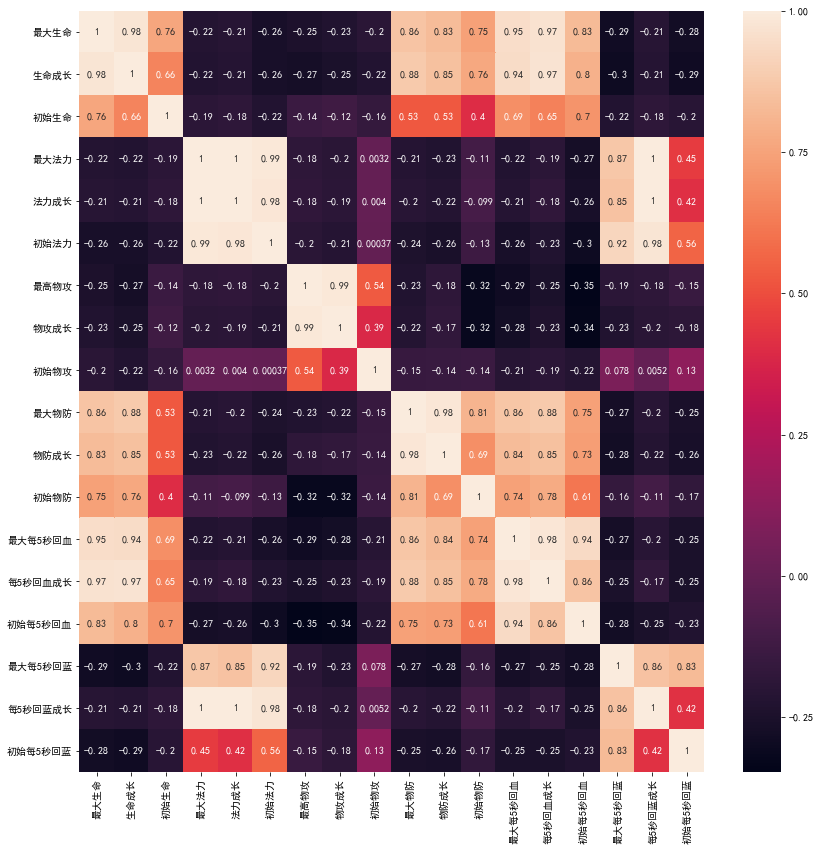

[ 1 12  8 20  0  0 19  8  6 12 18 12 20 22 24 18 28 20  0  7  4 15  7 15 15
 15  7  2  3 10 22 10 29  3 10 10  3 21 23 13 29  3  3 10 10 29 12 23 12  3
 26  9  5 11 11  1 16 12 25  0 16  5 17  1 14  9  9 27  2]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
# -*- coding: utf-8 -*-
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
 
# 数据加载，避免中文乱码问题
data_ori = pd.read_csv('./data/heros.csv', encoding = 'gb18030')
features = [u'最大生命',u'生命成长',u'初始生命',u'最大法力', u'法力成长',u'初始法力',u'最高物攻',u'物攻成长',u'初始物攻',u'最大物防',u'物防成长',u'初始物防', u'最大每5秒回血', u'每5秒回血成长', u'初始每5秒回血', u'最大每5秒回蓝', u'每5秒回蓝成长', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features]
 
# 对英雄属性之间的关系进行可视化分析
# 设置 plt 正确显示中文
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
# 用热力图呈现 features_mean 字段之间的相关性
corr = data[features].corr()
plt.figure(figsize=(14,14))
# annot=True 显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()
 
# 相关性大的属性保留一个，因此可以对属性进行降维
features_remain = [u'最大生命', u'初始生命', u'最大法力', u'最高物攻', u'初始物攻', u'最大物防', u'初始物防', u'最大每5秒回血', u'最大每5秒回蓝', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features_remain]
data[u'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%'))/100)
data[u'攻击范围']=data[u'攻击范围'].map({'远程':1,'近战':0})
# 采用 Z-Score 规范化数据，保证每个特征维度的数据均值为 0，方差为 1
ss = StandardScaler()
data = ss.fit_transform(data)
# 构造 GMM 聚类
gmm = GaussianMixture(n_components=30, covariance_type='full')
gmm.fit(data)
# 训练数据
prediction = gmm.predict(data)
print(prediction)
# 将分组结果输出到 CSV 文件中
data_ori.insert(0, '分组', prediction)
data_ori.to_csv('./hero_out.csv', index=False, sep=',')
